<a href="https://colab.research.google.com/github/alexandra-hidalgo/datasci_3_eda/blob/main/Datasci3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #3

## Packages Loading

In [4]:
!pip install pandas_profiling

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from pandas_profiling import ProfileReport


<ipython-input-5-d4309feb5d75>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Loading Data

In [7]:
Health_care = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/Hospital_Cost_Report_2019.csv')

In [8]:
Health_care

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,700569,52043,1125 SIR FRANCIS DRAKE OPERATING CO,1125 SIR FRANCIS DRAKE BLVD,KENTFIELD,CA,94904-1455,NaN,94904.0,U,...,3885386.0,282333.0,4167719.0,3.0,4167716.0,NaN,NaN,NaN,NaN,NaN
1,698041,421301,ABBEVILLE AREA MEDICAL CENTER,ABBEVILLE AREA MEDICAL CENTER,ABBEVILLE,SC,29620,ABBEVILLE,99942.0,R,...,-6000221.0,5205543.0,-794678.0,2754.0,-797432.0,0.525693,234123.0,7.476990e+05,NaN,NaN
2,709145,190034,ABBEVILLE GENERAL HOSPITAL,118 NORTH HOSPITAL DRIVE,ABBEVILLE,LA,70511-0580,VERMILION,29180.0,R,...,-1897650.0,3694407.0,1796757.0,NaN,1796757.0,0.308672,15429157.0,4.882032e+07,NaN,NaN
3,705454,240057,ABBOTT NORTHWESTERN HOSPITAL,800 EAST 28TH STREET,MINNEAPOLIS,MN,55407,HENNEPIN,33460.0,U,...,-179388418.0,229952218.0,50563800.0,NaN,50563800.0,0.268633,20419284.0,9.645565e+07,NaN,NaN
4,705220,450558,ABILENE REG MED CTR,6250 HWY 83/84,ABILENE,TX,79606,TAYLOR,10180.0,U,...,-7140506.0,10527317.0,3386811.0,NaN,3386811.0,0.100260,7349497.0,9.805427e+07,57736.0,1496447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,713551,61315,YUMA DISTRICT HOSPITAL,1000 WEST 8TH AVENUE,YUMA,CO,80759-,YUMA,99906.0,R,...,-957720.0,1618853.0,661133.0,895300.0,-234167.0,0.632121,1474583.0,4.257378e+06,9078.0,58303.0
6114,707159,30013,YUMA REGIONAL MEDICAL CENTER,2400 S AVENUE A,YUMA,AZ,85364,YUMA,49740.0,U,...,5718850.0,20614885.0,26333735.0,NaN,26333735.0,0.207615,77284918.0,5.216138e+08,NaN,NaN
6115,685609,33034,YUMA REHABILITATION HOSPITAL AN AFF,901 WEST 24TH STREET,YUMA,AZ,85364,YUMA,49740.0,U,...,6975502.0,-24724.0,6950778.0,NaN,6950778.0,NaN,NaN,NaN,NaN,NaN
6116,687770,192041,ZACHARY-AMG SPECIALTY HOSPITAL,4601 MCHUGH RD. BLDG B,ZACHARY,LA,70791,E. BATON ROUGE PARISH,12940.0,U,...,1497891.0,813.0,1498704.0,NaN,1498704.0,NaN,NaN,NaN,NaN,NaN


In [13]:
Health_care.shape
Health_care.sample(10)

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
2430,688241,51309,JEROLD PHELPS COMMUNITY HOSPITAL,733 CEDAR STREET,GARBERVILLE,CA,95442-,HUMBOLDT,99905.0,R,...,-3917221.0,10564776.0,6647555.0,NaN,6647555.0,1.019460,2736933.0,6332424.0,NaN,NaN
5867,700412,100315,VIERA HOSPITAL INC,8745 WICKHAM ROAD,VIERA,FL,32940,BREVARD,37340.0,U,...,14568481.0,4589258.0,19157739.0,NaN,19157739.0,0.192217,1315502.0,19829317.0,NaN,NaN
2663,689317,452068,KPC PROMISE HOSPITAL OF WICHITA FALL,1103 GRACE STREET,WICHITA FALLS,TX,76301,WICHITA,48660.0,U,...,2400700.0,737110.0,3137810.0,NaN,3137810.0,NaN,NaN,NaN,NaN,NaN
1900,699963,171367,GOVE COUNTY MEDICAL CENTER,520 WEST 5TH,QUINTER,KS,67752-0129,GOVE,99917.0,R,...,-2636807.0,2541156.0,-95651.0,NaN,-95651.0,0.800898,1794269.0,1962294.0,NaN,NaN
1667,705024,240141,FAIRVIEW NORTHLAND REG,911 NORTHLAND DR,PRINCETON,MN,55371,SHERBURNE,33460.0,U,...,3370926.0,2116927.0,5487853.0,NaN,5487853.0,0.301718,8751049.0,33526425.0,NaN,NaN
4501,720352,440133,SAINT THOMAS MIDTOWN HOSPITAL,2000 CHURCH ST,NASHVILLE,TN,37236,DAVIDSON,34980.0,U,...,6245148.0,40167113.0,46412261.0,3851165.0,42561096.0,0.189673,14339418.0,223678893.0,6081993.0,31363214.0
4628,684236,452112,SE TEXAS ER & HOSPITAL,19211 MCKAY BLVD,HUMBLE,TX,77338,HARRIS,26420.0,U,...,-4451714.0,2446220.0,-2005494.0,NaN,-2005494.0,NaN,NaN,NaN,NaN,NaN
2751,671191,673059,LAREDO REHABILITATION HOSPITAL,2005A E BUSTAMANTE STREET,LAREDO,TX,78041,WEBB,29700.0,U,...,2567424.0,226256.0,2793680.0,NaN,2793680.0,NaN,NaN,NaN,NaN,NaN
431,707833,370016,BASS BAPTIST HEALTH CENTER,600 SOUTH MONROE,ENID,OK,73702,GARFIELD,21420.0,U,...,-11337760.0,6072911.0,-5264849.0,NaN,-5264849.0,0.163668,7146726.0,61125545.0,NaN,NaN
1576,685618,103040,ENCOMPASS HEALTH REHABILITATION HOSP,1847 FLORIDA AVENUE,PANAMA CITY,FL,32405,BAY,37460.0,U,...,433119.0,3829086.0,4262205.0,NaN,4262205.0,NaN,NaN,NaN,NaN,NaN


In [14]:
Health_care.columns

Index(['rpt_rec_num', 'Provider CCN', 'Hospital Name', 'Street Address',
       'City', 'State Code', 'Zip Code', 'County', 'Medicare CBSA Number',
       'Rural Versus Urban',
       ...
       'Net Income from Service to Patients', 'Total Other Income',
       'Total Income', 'Total Other Expenses', 'Net Income',
       'Cost To Charge Ratio', 'Net Revenue from Medicaid', 'Medicaid Charges',
       'Net Revenue from Stand-Alone SCHIP', 'Stand-Alone SCHIP Charges'],
      dtype='object', length=126)

### Removing white spaces

In [15]:
Health_care.columns = Health_care.columns.str.replace(' ', '')
Health_care.columns

Index(['rpt_rec_num', 'ProviderCCN', 'HospitalName', 'StreetAddress', 'City',
       'StateCode', 'ZipCode', 'County', 'MedicareCBSANumber',
       'RuralVersusUrban',
       ...
       'NetIncomefromServicetoPatients', 'TotalOtherIncome', 'TotalIncome',
       'TotalOtherExpenses', 'NetIncome', 'CostToChargeRatio',
       'NetRevenuefromMedicaid', 'MedicaidCharges',
       'NetRevenuefromStand-AloneSCHIP', 'Stand-AloneSCHIPCharges'],
      dtype='object', length=126)

In [16]:
Health_care.isnull().sum()

rpt_rec_num                          0
ProviderCCN                          0
HospitalName                         0
StreetAddress                        4
City                                 0
                                  ... 
CostToChargeRatio                 1427
NetRevenuefromMedicaid            1602
MedicaidCharges                   1610
NetRevenuefromStand-AloneSCHIP    5129
Stand-AloneSCHIPCharges           5114
Length: 126, dtype: int64

In [21]:
Health_care['NetIncomefromServicetoPatients']
Health_care.dtypes

rpt_rec_num                         int64
ProviderCCN                         int64
HospitalName                       object
StreetAddress                      object
City                               object
                                   ...   
CostToChargeRatio                 float64
NetRevenuefromMedicaid            float64
MedicaidCharges                   float64
NetRevenuefromStand-AloneSCHIP    float64
Stand-AloneSCHIPCharges           float64
Length: 126, dtype: object

In [18]:
Health_care.NetIncomefromServicetoPatients.describe()

count    6.026000e+03
mean    -7.969686e+06
std      8.332967e+07
min     -1.216407e+09
25%     -7.091676e+06
50%     -1.062568e+06
75%      3.450148e+06
max      2.209102e+09
Name: NetIncomefromServicetoPatients, dtype: float64

In [19]:
Health_care.AccountsPayable.describe()

count    5.753000e+03
mean     1.369399e+07
std      1.014847e+08
min     -1.447607e+09
25%      6.947460e+05
50%      2.443320e+06
75%      8.682407e+06
max      2.294855e+09
Name: AccountsPayable, dtype: float64

In [20]:
Health_care.AccountsReceivable.describe()

count    5.765000e+03
mean     6.531350e+07
std      1.891850e+08
min     -2.876191e+08
25%      4.407833e+06
50%      1.402748e+07
75%      5.479566e+07
max      6.129113e+09
Name: AccountsReceivable, dtype: float64

In [26]:
Health_care.CostofCharityCare.describe()

count    4.315000e+03
mean     5.205077e+06
std      1.721792e+07
min      1.000000e+00
25%      1.829760e+05
50%      1.043498e+06
75%      4.238814e+06
max      6.404568e+08
Name: CostofCharityCare, dtype: float64

In [29]:
Health_care.groupby('MedicareCBSANumber').CostofCharityCare.describe()

,count,mean,std,min,25%,50%,75%,max
MedicareCBSANumber,,,,,,,,
10180.0,3.0,6.527015e+06,8.071821e+06,113671.0,1995110.50,3876550.0,9733687.00,15590824.0
10220.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10380.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10420.0,4.0,5.552418e+06,5.608537e+06,644731.0,830659.75,5022802.5,9744561.00,11519337.0
10500.0,2.0,7.957902e+06,9.750244e+06,1063438.0,4510669.75,7957901.5,11405133.25,14852365.0
...,...,...,...,...,...,...,...,...
99951.0,25.0,4.491328e+05,1.098489e+06,2827.0,41806.00,164514.0,338640.00,5436721.0
99952.0,52.0,4.434145e+05,5.170169e+05,19596.0,115478.50,239948.0,595745.25,2243677.0
99953.0,23.0,6.063488e+05,6.103791e+05,16384.0,87612.50,551121.0,854002.50,2270325.0


In [32]:
Health_care.groupby('ZipCode').CostofCharityCare.describe()

,count,mean,std,min,25%,50%,75%,max
ZipCode,,,,,,,,
00605-4055,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00614,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00623,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00631,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00641,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99833-,1.0,124694.0,NaN,124694.0,124694.0,124694.0,124694.0,124694.0
99835-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99901-5746,1.0,811016.0,NaN,811016.0,811016.0,811016.0,811016.0,811016.0


In [34]:
Health_care.groupby('ProviderCCN').MedicaidCharges.describe()

,count,mean,std,min,25%,50%,75%,max
ProviderCCN,,,,,,,,
10001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,1.0,55945421.0,NaN,55945421.0,55945421.0,55945421.0,55945421.0,55945421.0
10006,1.0,70040461.0,NaN,70040461.0,70040461.0,70040461.0,70040461.0,70040461.0
10007,1.0,5564757.0,NaN,5564757.0,5564757.0,5564757.0,5564757.0,5564757.0
10008,1.0,7764443.0,NaN,7764443.0,7764443.0,7764443.0,7764443.0,7764443.0
...,...,...,...,...,...,...,...,...
673067,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673068,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673069,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize the distribution of select numerical variables using histograms.

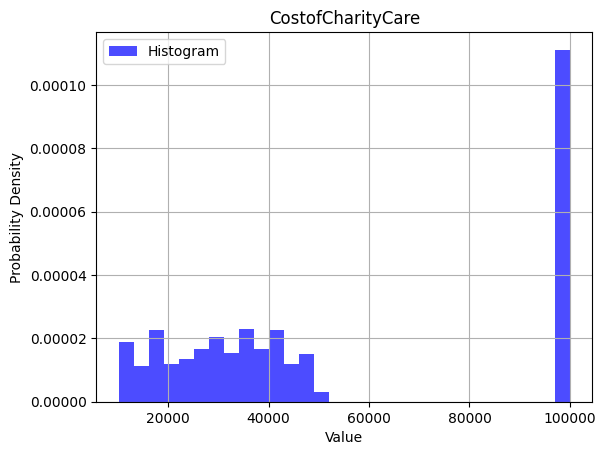

In [47]:
plt.hist(Health_care['MedicareCBSANumber'],bins=30, density=True, alpha=0.7, color='blue', label='Histogram')
plt.title('CostofCharityCare')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


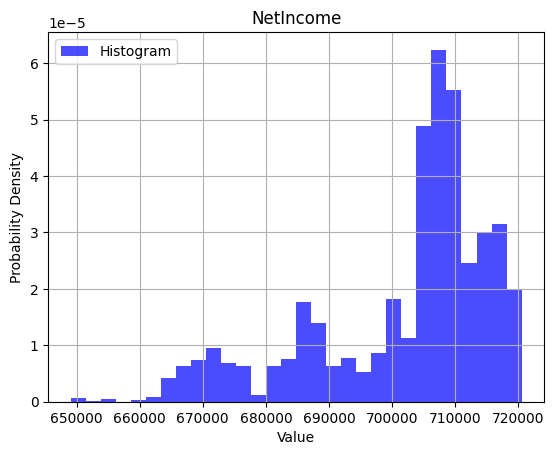

In [45]:
plt.hist(Health_care['rpt_rec_num'],bins=30, density=True, alpha=0.7, color='blue', label='Histogram')
plt.title('NetIncome')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Identifying outliners

# EDA tools

In [ ]:
report = ProfileReport(Health_care)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]